In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) 

df = pd.read_csv("diamonds.csv")
df_clean = pd.read_csv("diamonds_encoded_scaled_5000.csv")

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [8]:
df_clean.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.041580,0.533333,0.250000,0.442272,0.079966,0.092453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1050
1,0.174636,0.525000,0.269231,0.604283,0.109677,0.126101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4515
2,0.114345,0.488889,0.250000,0.553073,0.100170,0.112893,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2415
3,0.031185,0.505556,0.288462,0.422719,0.076570,0.087107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,906
4,0.268191,0.541667,0.288462,0.670391,0.123260,0.142138,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7773


In [9]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [10]:
df_clean['x'].describe()

count    5000.000000
mean        0.535698
std         0.105135
min         0.000000
25%         0.439479
50%         0.531657
75%         0.609870
max         0.840782
Name: x, dtype: float64

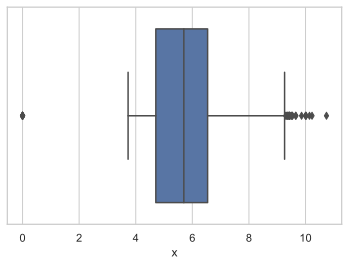

In [14]:
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["x"])

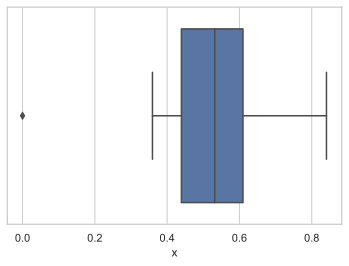

In [15]:
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_clean["x"])

In [17]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
11182,1.07,Ideal,F,SI2,61.6,56.0,0.0,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.00,0.0,5139
15951,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,6381
24520,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.00,0.0,12800
26243,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.00,0.0,15686
27429,2.25,Premium,H,SI2,62.8,59.0,0.0,0.00,0.0,18034
49556,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130
49557,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130


In [18]:
df_clean[df_clean['x'] == 0]

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
121,0.282744,0.533333,0.211538,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12800


In [22]:
df_clean[df_clean['x'] >= 0.84]

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
423,0.540541,0.502778,0.307692,0.840782,0.152462,0.172956,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15030


In [33]:
df[df['price'] == 12800]

,carat,cut,color,clarity,depth,table,x,y,z,price
24519,1.54,Premium,G,VS2,60.9,59.0,7.49,7.45,4.55,12800
24520,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.00,12800


In [31]:
xIQR = (df['x'].quantile(.75)) - (df['x'].quantile(.25))
xIQR

1.83

In [32]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64